In [26]:
#imports

import pandas as pd
import numpy as np


#CLF tree imports
from sklearn import tree
import pydotplus 
from IPython.display import Image
from sklearn.metrics import accuracy_score

#knn imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle


import time
import matplotlib.patches as mpatches


from sklearn.metrics import f1_score


import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [27]:
#pre proccessing for Wave data
waveColumns=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20', '21','Class'] 
waveData = pd.read_csv('waveform.data', names=waveColumns)

#preproccessing for the german data
germanColumns=['Status of checking account', 'duration in month','credit history', 'purpose', 'credit amount', 'Savings account/bonds', 'present employment since', 'installment rate in percentage of disposable income', 'personal status and sex', 'other debtors / gurantors', 'present residnce sine', 'property', 'age in years', 'other installment plans', 'housing', 'number of existing credits at this bank', 'job', 'Number of people being liable to prodive maintenance for','telephone', 'foreign worker', 'Class'] 

germanData = pd.read_csv('german.data', delimiter=r"\s+",  names=germanColumns) 

#preprocess data/ replace the strings with ints
germanData.replace('A11', 0, inplace=True)
germanData.replace('A12', 1, inplace=True)
germanData.replace('A13', 2, inplace=True)
germanData.replace('A14', 3, inplace=True)

germanData.replace('A30', 0, inplace=True)
germanData.replace('A31', 1, inplace=True)
germanData.replace('A32', 2, inplace=True)
germanData.replace('A33', 3, inplace=True)
germanData.replace('A34', 4, inplace=True)

germanData.replace('A40', 0, inplace=True)
germanData.replace('A41', 1, inplace=True)
germanData.replace('A42', 2, inplace=True)
germanData.replace('A43', 3, inplace=True)
germanData.replace('A44', 4, inplace=True)
germanData.replace('A45', 5, inplace=True)
germanData.replace('A46', 6, inplace=True)
germanData.replace('A47', 8, inplace=True)
germanData.replace('A48', 9, inplace=True)
germanData.replace('A49', 10, inplace=True)
germanData.replace('A410', 11, inplace=True)

germanData.replace('A61', 0, inplace=True)
germanData.replace('A62', 1, inplace=True)
germanData.replace('A63', 2, inplace=True)
germanData.replace('A64', 3, inplace=True)
germanData.replace('A65', 4, inplace=True)

germanData.replace('A71', 0, inplace=True)
germanData.replace('A72', 1, inplace=True)
germanData.replace('A73', 2, inplace=True)
germanData.replace('A74', 3, inplace=True)
germanData.replace('A75', 4, inplace=True)

germanData.replace('A91', 0, inplace=True)
germanData.replace('A92', 1, inplace=True)
germanData.replace('A93', 2, inplace=True)
germanData.replace('A94', 3, inplace=True)
germanData.replace('A95', 4, inplace=True)

germanData.replace('A101', 0, inplace=True)
germanData.replace('A102', 1, inplace=True)
germanData.replace('A103', 2, inplace=True)

germanData.replace('A121', 0, inplace=True)
germanData.replace('A122', 1, inplace=True)
germanData.replace('A123', 2, inplace=True)
germanData.replace('A124', 3, inplace=True)

germanData.replace('A141', 0, inplace=True)
germanData.replace('A142', 1, inplace=True)
germanData.replace('A143', 2, inplace=True)

germanData.replace('A151', 0, inplace=True)
germanData.replace('A152', 1, inplace=True)
germanData.replace('A153', 2, inplace=True)

germanData.replace('A171', 0, inplace=True)
germanData.replace('A172', 1, inplace=True)
germanData.replace('A173', 2, inplace=True)
germanData.replace('A174', 3, inplace=True)

germanData.replace('A191', 0, inplace=True)
germanData.replace('A192', 1, inplace=True)

germanData.replace('A201', 0, inplace=True)
germanData.replace('A202', 1, inplace=True)



## Tree

In [28]:
#wave data tree
#make trees of depth 3 - 10

repeats = 8
accuracies = []
times = []
fscores = []
for i in range(repeats):
    #randomize the data
    randWaveData = shuffle(waveData)
    #set 90% of the data to train 10% to test 10% of the train for valid
    
    testWaveData = randWaveData.tail(500)
    trainWaveData = randWaveData.head(4500)
    validateWaveData = trainWaveData.head(450)
    trainWaveData = trainWaveData.tail(4050)

    #set data
    Y = trainWaveData['Class']
    X = trainWaveData.drop(['Class'],axis=1)
    testY = testWaveData['Class']
    testX = testWaveData.drop(['Class'],axis=1)

    #make tree
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i+3)
    clf = clf.fit(X, Y)
    
    # get accuracy
    
    start = time.time()
    predY = clf.predict(testX)
    end = time.time()
    times.append(end-start)
    testY = testWaveData['Class']
    acc = accuracy_score(testY, predY)
    accuracies.append(acc)
    
    validY = validateWaveData['Class']
    validPredY = clf.predict(validateWaveData.drop(['Class'],axis=1))
    fscore = f1_score(validY, validPredY, average='macro')
    fscores.append(fscore) 

avg = 0
for a in accuracies:
    avg = a + avg
avg = avg/repeats
print('average accuracy is: ', avg)

tim = 0
for t in times:
    tim = t + tim
tim = tim/repeats
print('average time is: ', tim, ' seconds')
wavetimes = [tim]

#f score
fscore = 0
for f in fscores:
    fscore = f + fscore
fscore = fscore/repeats
print('average F-measure is: ', fscore)
wavefScores = [fscore]


print('all f scores are: ', fscores)
print('best depth based on f measure is: ', fscores.index(max(fscores)) + 1, ', with an f-measure of: ', max(fscores), '')

average accuracy is:  0.7565000000000001
average time is:  0.0023752152919769287  seconds
average F-measure is:  0.7482496702844963
all f scores are:  [0.7060033013618959, 0.744154461489806, 0.7475913050651309, 0.747482850287508, 0.7630812651373712, 0.7601735111978587, 0.7691821459421297, 0.7483285217942695]
best depth based on f measure is:  7 , with an f-measure of:  0.7691821459421297 


In [29]:
#german data tree

repeats = 8
accuracies = []
times = []
fscores = []

for i in range(repeats):
    #randomize the data
    randGermanData = shuffle(germanData)

    #set 90% of the data to train 10% to test 10% of the train to validate
    testGermanData = randData.tail(500)
    trainGermanData = randData.head(4500)#set 90% of the data to train 10% to test
    validateGermanData = trainGermanData.head(450)
    trainGermanData = trainGermanData.tail(4050)

    #set data
    Y = trainGermanData['Class']
    X = trainGermanData.drop(['Class'],axis=1)
    testY = testGermanData['Class']
    testX = testGermanData.drop(['Class'],axis=1)

    #make tree
    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=i+3)
    clf = clf.fit(X, Y)
    
    
    start = time.time()
    predY = clf.predict(testX)
    end = time.time()
    times.append(end-start)
    
    testY = testGermanData['Class']
    acc = accuracy_score(testY, predY)
    accuracies.append(acc) 
    
    predY = clf.predict(testX)
    validPredY = clf.predict(validateGermanData.drop(['Class'],axis=1))
    validY = validateGermanData['Class']
    
    fscore = f1_score(validY, validPredY, average='macro')
    fscores.append(fscore) 


#accuracy and time
avg = 0
for a in accuracies:
    avg = a + avg
avg = avg/repeats
print('average accuracy is: ', avg)

tim = 0
for t in times:
    tim = t + tim
tim = tim/repeats
print('average time is: ', tim, ' seconds')
germantimes = [tim]

#f score
fscore = 0
for f in fscores:
    fscore = f + fscore
fscore = fscore/repeats
print('average F-measure is: ', fscore)
germanfScores = [fscore]


print('all f scores are: ', fscores)
print('best k based on f measure is: ', fscores.index(max(fscores)) + 1, ', with an f-measure of: ', max(fscores), '')

average accuracy is:  0.83175
average time is:  0.0020001232624053955  seconds
average F-measure is:  0.7866494099796408
all f scores are:  [0.6709514730303217, 0.6872701756279898, 0.7220873131509362, 0.7707168245354483, 0.8236331569664903, 0.8334439452726159, 0.8857860587404578, 0.8993063325128665]
best k based on f measure is:  8 , with an f-measure of:  0.8993063325128665 


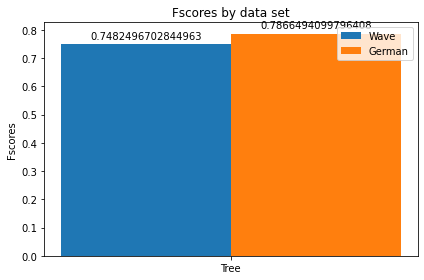

In [30]:


labels = ['Tree']

#f measures
waveF = wavefScores
germanF = germanfScores

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, waveF, width, label='Wave')
rects2 = ax.bar(x + width/2, germanF, width, label='German')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fscores')
ax.set_title('Fscores by data set')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## KNN

In [32]:
#KNN algorithm for wave data

#number of runs
repeats = 5
accuracies = []
times = []
fscores = []


#450 of the train is validation data

for i in range(repeats):
    #randomize the data
    randWaveData = shuffle(waveData)
    #set 90% of the data to train 10% to test
    testWaveData = randWaveData.tail(500)
    trainWaveData = randWaveData.head(4500)
    validateWaveData = trainWaveData.head(450)
    trainWaveData = trainWaveData.tail(4050)
   #make the KNN classifier
    
    knn = KNeighborsClassifier(n_neighbors=i+1, metric='minkowski', p=2)
    
    knn.fit( trainWaveData.drop(['Class'],axis=1),trainWaveData['Class'])
    
    # get accuracy and time
    start = time.time()
    predY = knn.predict(testWaveData.drop(['Class'],axis=1))
    end = time.time()
    times.append(end-start)
    
    
    testY = testWaveData['Class']
    acc = accuracy_score(testY, predY)
    accuracies.append(acc) 

      
    validPredY = knn.predict(validateWaveData.drop(['Class'],axis=1))
    validY = validateWaveData['Class']
    
    fscore = f1_score(validY, validPredY, average='macro')
    fscores.append(fscore) 

    
avg = 0
for a in accuracies:
    avg = a + avg
avg = avg/repeats
print('average accuracy is: ', avg)

tim = 0
for t in times:
    tim = t + tim
tim = tim/repeats
print('average time is: ', tim, ' seconds')
wavetimes = [tim]

#f score
fscore = 0
for f in fscores:
    fscore = f + fscore
fscore = fscore/repeats
print('average F-measure is: ', fscore)
wavefScores = [fscore]



print('all f scores are: ', fscores)
print('best k based on f measure is: ', fscores.index(max(fscores)) + 1, ', with an f-measure of: ', max(fscores))

average accuracy is:  0.7944
average time is:  0.10080575942993164  seconds
average F-measure is:  0.7953126858403073
all f scores are:  [0.7697783320468146, 0.7464506359587167, 0.8286867887251518, 0.8263500482160078, 0.8052976242548459]
best k based on f measure is:  3 , with an f-measure of:  0.8286867887251518


In [33]:
#KNN algorithm for german data
#number of runs
repeats = 5
accuracies = []
times = []
fscores = []

for i in range(repeats):
    #randomize the data
    randData = shuffle(germanData)
    #set 90% of the data to train 10% to test 10% of the train to validate
    testGermanData = randData.tail(500)
    trainGermanData = randData.head(4500)#set 90% of the data to train 10% to test
    validateGermanData = trainGermanData.head(450)
    trainGermanData = trainGermanData.tail(4050)

   #make the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=i+1, metric='minkowski', p=2)
    knn.fit( trainGermanData.drop(['Class'],axis=1),trainGermanData['Class'])

    # get accuracy and time
    start = time.time()
    predY = knn.predict(testGermanData.drop(['Class'],axis=1))
    end = time.time()
    times.append(end-start)
    
    testY = testGermanData['Class']
    acc = accuracy_score(testY, predY)
    accuracies.append(acc) 
    #print('Accuracy on test number ', i+1, ' is %.2f' % (acc))

    validPredY = knn.predict(validateGermanData.drop(['Class'],axis=1))
    validY = validateGermanData['Class']
    fscore = f1_score(validY, validPredY, average='macro')
    fscores.append(fscore) 

    
    
avg = 0
for a in accuracies:
    avg = a + avg
avg = avg/repeats
print('average accuracy is: ', avg)
print('all accs are: ', accuracies)

tim = 0
for t in times:
    tim = t + tim
tim = tim/repeats
print('average time is: ', tim, ' seconds')
germantimes = [tim]


#for index of max values.index(max(values))

#f score
fscore = 0
for f in fscores:
    fscore = f + fscore
fscore = fscore/repeats
print('average F-measure is: ', fscore)
germanfScores = [fscore]

print('all f scores are: ', fscores)
print('best k based on f measure is: ', fscores.index(max(fscores)) + 1, ', with an f-measure of: ', max(fscores))


average accuracy is:  0.8156000000000001
all accs are:  [1.0, 0.802, 0.8, 0.734, 0.742]
average time is:  0.026801586151123047  seconds
average F-measure is:  0.7485506067959594
all f scores are:  [1.0, 0.7021497021497022, 0.7444262468300931, 0.6281856905638582, 0.6679913944361433]
best k based on f measure is:  1 , with an f-measure of:  1.0


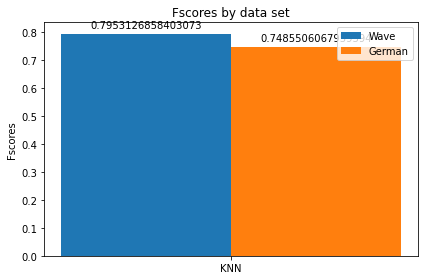

In [36]:
#comparing the results from both data sets for KNN
#germantimes = times

labels = ['KNN']

#f measures
waveF = wavefScores
germanF = germanfScores

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, waveF, width, label='Wave')
rects2 = ax.bar(x + width/2, germanF, width, label='German')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fscores')
ax.set_title('Fscores by data set')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
   
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

By comparing charts we see that the fscore for the wave form data is higher when using K-NN method, whereas when using the CLF Tree method the german data has a higher f score.